In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm

from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

#path of the datasets
os.chdir("../Statistical Learning Answers/..")
dataset_path = os.path.join(os.getcwd(),"DataSets")

In [19]:
auto_df = pd.read_csv(f'{dataset_path}/Auto.csv')

treated_auto_df = auto_df.loc[auto_df.horsepower.apply(lambda x: x.isnumeric())].copy().reset_index()
treated_auto_df['horsepower'] = pd.to_numeric(treated_auto_df['horsepower'])

print(treated_auto_df.head())
print(treated_auto_df.shape)

   index   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0      0  18.0          8         307.0         130    3504          12.0   
1      1  15.0          8         350.0         165    3693          11.5   
2      2  18.0          8         318.0         150    3436          11.0   
3      3  16.0          8         304.0         150    3433          12.0   
4      4  17.0          8         302.0         140    3449          10.5   

   year  origin                       name  
0    70       1  chevrolet chevelle malibu  
1    70       1          buick skylark 320  
2    70       1         plymouth satellite  
3    70       1              amc rebel sst  
4    70       1                ford torino  
(392, 10)


## a)

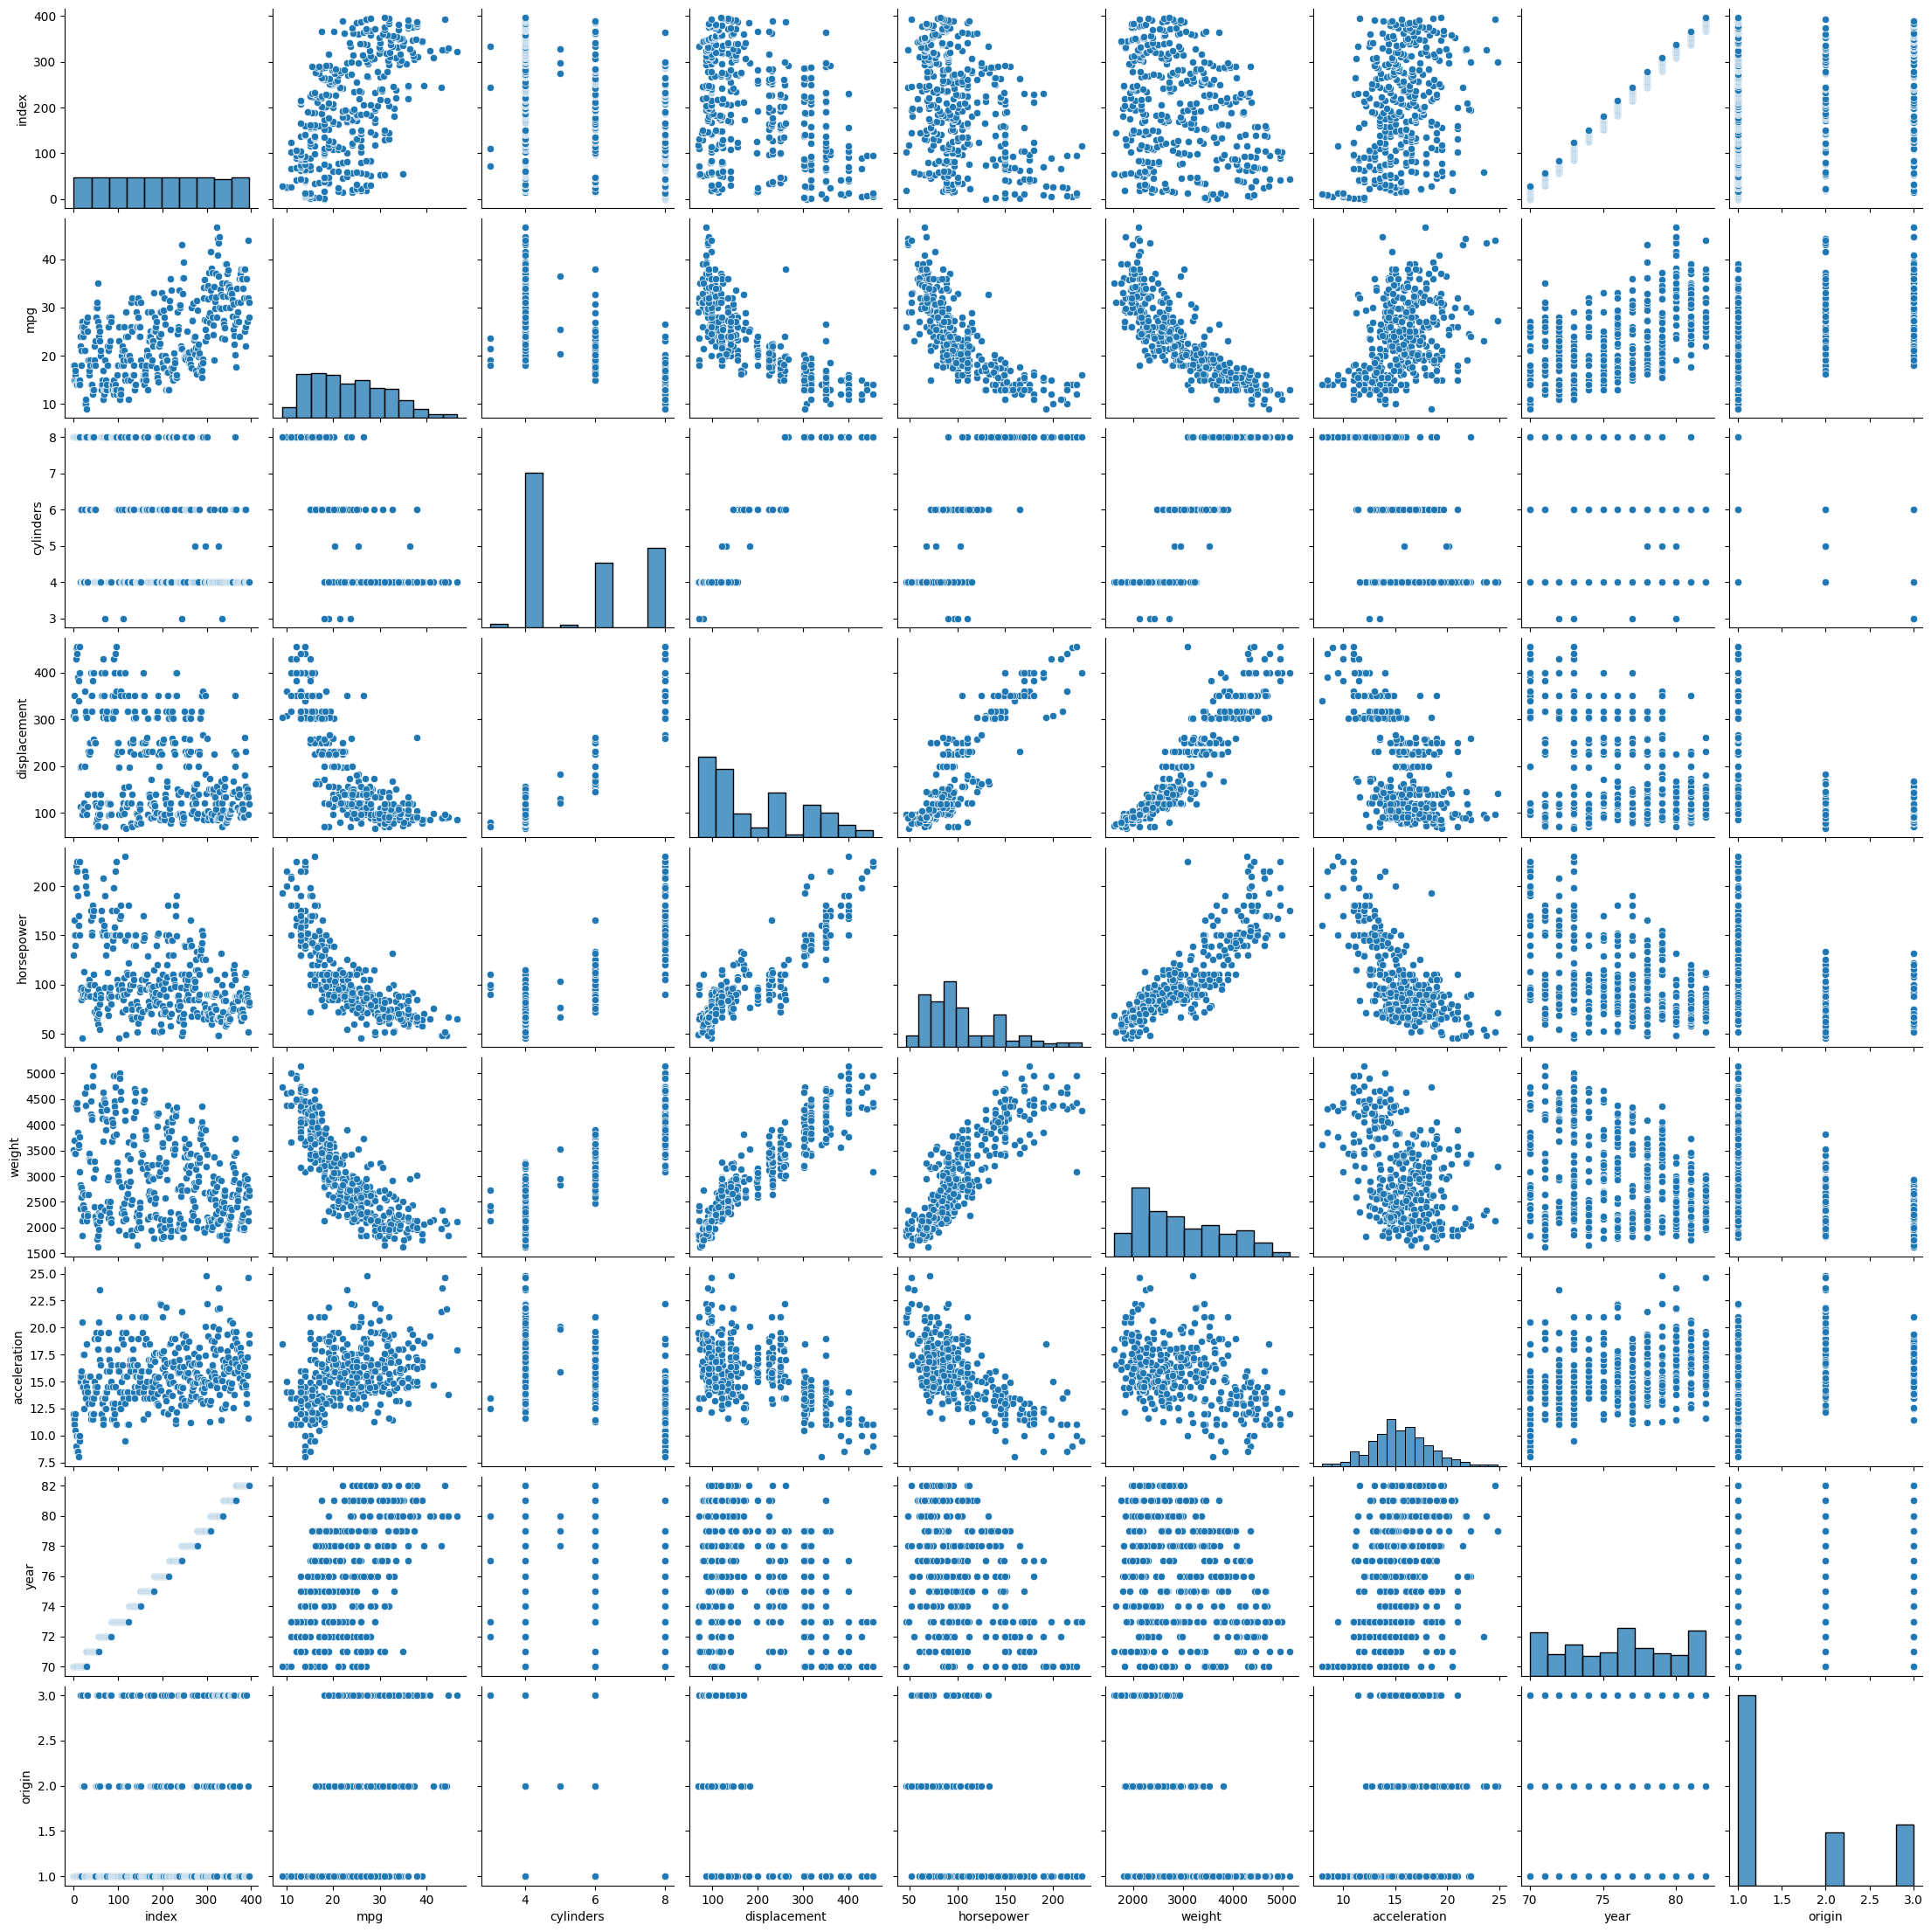

In [3]:
sns.pairplot(treated_auto_df)
plt.show()

## b)

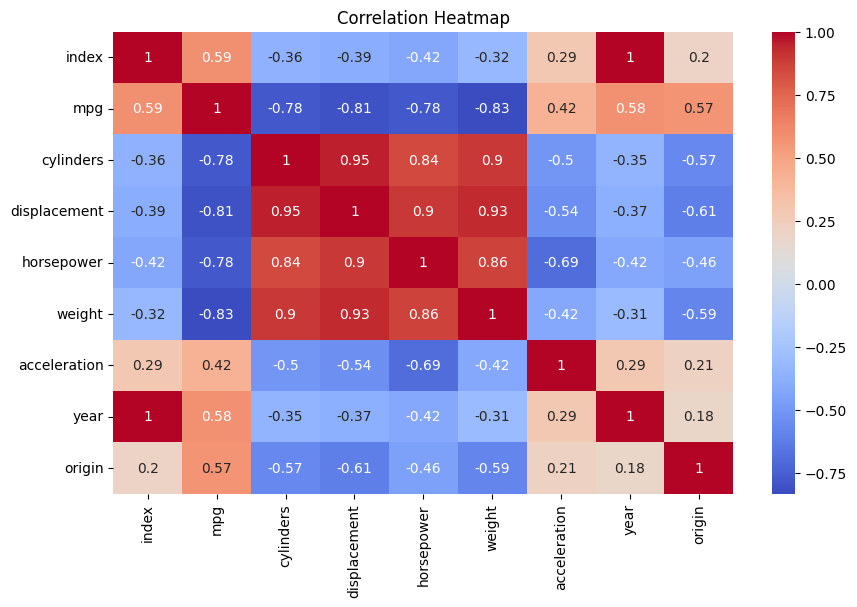

In [4]:
# Correlation between all the numerical columns
numerical_columns = treated_auto_df.select_dtypes('number').columns
plt.figure(figsize=(10, 6))
sns.heatmap(treated_auto_df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## C)

In [22]:
X = treated_auto_df.drop(['mpg', 'name', 'index'], axis=1)

y = treated_auto_df.mpg

result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Tue, 26 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:25:26   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement     0.0219      0.008      2.871      0.004       0.007       0.037
horsepower      -0.0396      0.013     -3.147      0.002      -0.064      -0.015
weight          -0.0060      0.001     -9.258      0.000      -0.007      -0.005
acceleration    -0.0796      0.090     -0.881      0.379      -0.257       0.098
year             0.5836      0.024     24.150      0.000       0.536       0.631
origin           1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### i.
The relationship between the predictors and the response is proved by the large value of F-statistic

### ii.
we can evaluate the predictors with strong relationships seeing the lowests p-values. In this case, the weight, year and origin have the strongests relatoships with the response variable.

### iii.
The year has a positive relationship with mpg, therefore over the years the mpg is increasing. 

## d)

In [6]:
# Variables

fittedvalues = result.fittedvalues

infl = result.get_influence()

studentized_residuals = infl.resid_studentized_internal


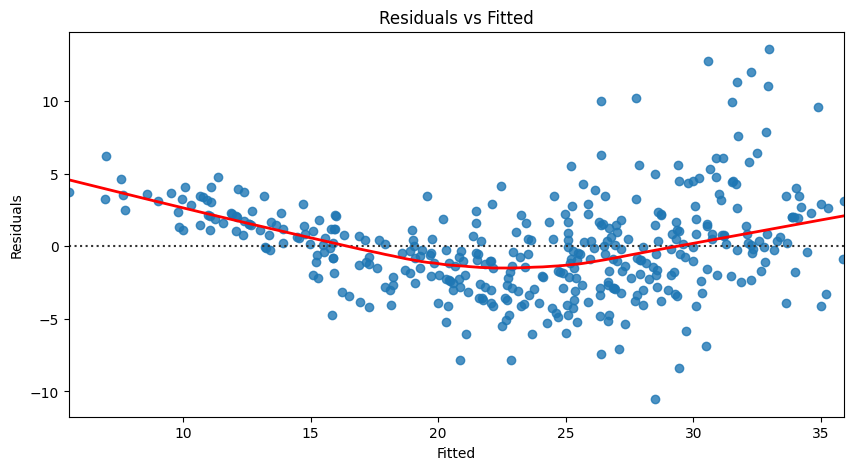

In [7]:
# Residuals vs Fitted Plot
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.residplot(
    x=fittedvalues,
    y='mpg',
    data=treated_auto_df,
    lowess=True,
    line_kws={'color': 'red', 'lw': 2},
)
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted')
ax.set_title('Residuals vs Fitted')

plt.show()

We clearly can see a trend in the Residuals, it is a sign that the real f is not linear.

And the Residuals shows an funnel shape indicating heteroscedasticity.

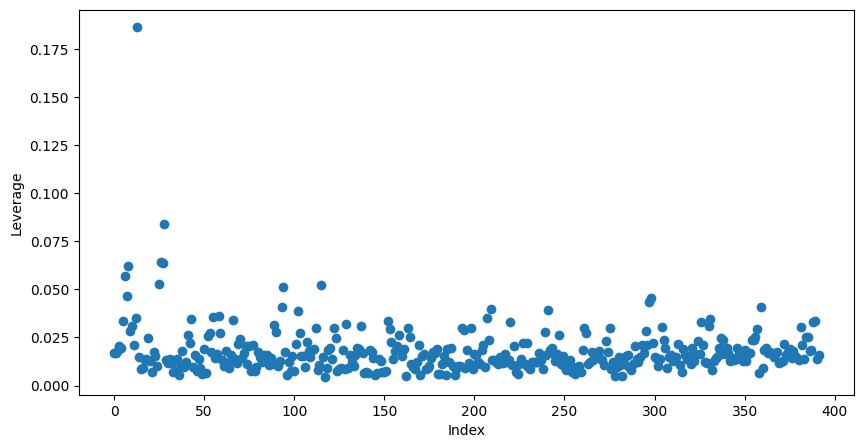

13


In [8]:
# Leverage
ax = plt.subplots(figsize=(10,5))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
plt.show()
print(np.argmax(infl.hat_matrix_diag))

We can see that the 13th observation has an leverage above average.

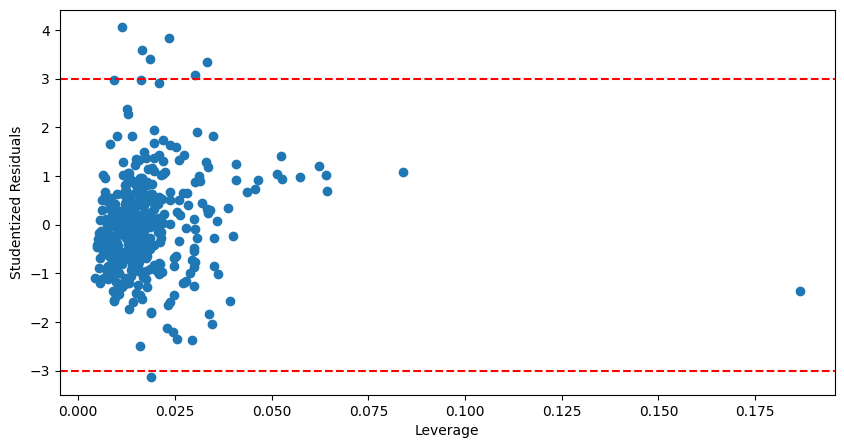

In [16]:
# Outliers and Leverage

ax = plt.subplots(figsize=(10,5))[1]
ax.scatter(infl.hat_matrix_diag, studentized_residuals)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

ax.axhline(y=3, color='red', linestyle='--', label='Constant Line')
ax.axhline(y=-3, color='red', linestyle='--', label='Constant Line')

plt.show()


There are some observation that surpass the absolute value of 3 for the studentized residuals, but it's nothing too unusual.

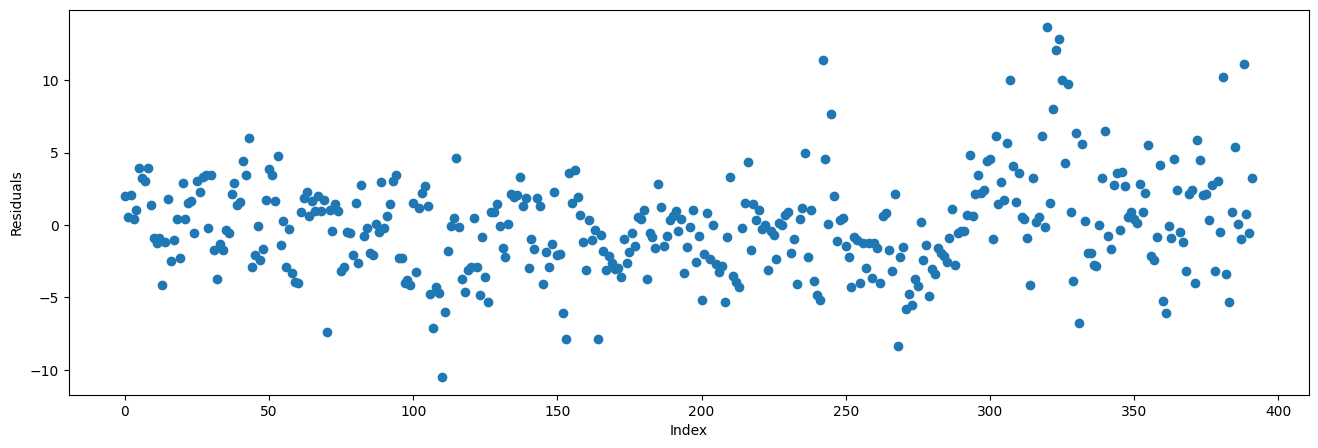

In [13]:
# Correlation of Error terms
ax = plt.subplots(figsize=(16,5))[1]
ax.scatter(treated_auto_df.index, result.resid)
ax.set_xlabel('Index')
ax.set_ylabel('Residuals')

plt.show()

## e)

In [24]:
# Interaction Terms
X_int = X.copy()

X_int['horsepower_year'] = X_int.horsepower + X_int.year
X_int['horsepower_weight'] = X_int.horsepower + X_int.weight
X_int['displacement_horsepower'] = X_int.displacement + X_int.year
X_int['displacement_origin'] = X_int.displacement + X_int.origin

result = sm.OLS(y, X_int).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Tue, 26 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:25:34   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
cylinders                  -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement               -0.4081      0.065     -6.313      0.000      -0.535      -0.281
horsepower                 -0.1694      0.014    -12.227      0.000      -0.197      -0.142
weight                      0.0817      0.007     11.620      0.000       0.068       0.096
acceleration               -0.0796      0.090     -0.881      0.379      -0.257       0.098
year                        0.3870      0.026     14.933      0.000       0.336       0.438
origin                      0.8590      0.173      4.974      0.000       0.519       1.199
horsepower_year             0.2176      0.013     16.236      0.000       0.191       0.244
horsepower_weight          -0.0877      0.007    -12.826      0.000      -0.101      -0.074
displacement_horsepower    -0.0210      0.042     -0.500      0.617      -0.104       0.062
displacement_origin         0.4510      0.108      4.166      0.000       0.238       0.664
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     1.94e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can see that the interactions displancement_horsepower, horsepower_weight and displacement_origin have low p-value, so we can't disconsider their coefficients and the alone terms that made the interaction because of the hierarchy principle.

## f)

In [26]:
# Transformations
X_trans = X.copy()

X_trans['horsepower^2'] = np.power(X_trans.horsepower, 2)
X_trans['log_horsepower'] = np.log(X_trans.horsepower) 

X_trans['weight^2'] = np.power(X_trans.weight, 2)
X_trans['log_weight'] = np.log(X_trans.weight) 

result = sm.OLS(y, X_trans).fit()

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2551.
Date:                Tue, 26 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:29:25   Log-Likelihood:                         -968.10
No. Observations:                 392   AIC:                                      1958.
Df Residuals:                     381   BIC:                                      2002.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylinders         -0.0359      0.316     -0.114      0.910      -0.656       0.585
displacement       0.0002      0.007      0.021      0.983      -0.014       0.014
horsepower         0.1050      0.172      0.610      0.542      -0.234       0.444
weight            -0.0184      0.003     -5.746      0.000      -0.025      -0.012
acceleration      -0.1983      0.100     -1.974      0.049      -0.396      -0.001
year               0.7705      0.045     17.097      0.000       0.682       0.859
origin             0.7119      0.252      2.821      0.005       0.216       1.208
horsepower^2    7.261e-06      0.000      0.021      0.984      -0.001       0.001
log_horsepower   -17.8770      9.537     -1.875      0.062     -36.628       0.875
weight^2        1.708e-06   3.18e-07      5.364      0.000    1.08e-06    2.33e-06
log_weight         9.5834      4.655      2.059      0.040       0.431      18.736
==============================================================================
Omnibus:                       33.163   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.024
Skew:                           0.501   Prob(JB):                     2.06e-14
Kurtosis:                       4.690   Cond. No.                     7.98e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The transformation with the lowest p-value is weight^2, so we can use it in the training of the model.

Also, the R^2 increased with this version of the predictores
